## Portfolio Optimization

* Portfolio optimization models look for the optimal way to make investments. 
  * Usually investors expect either a maximum return for a given level of risk or a given return for a minimum risk so these models are typically based on two criteria: **maximization of the expected return and/or minimization of the risk**.

### Some Notation

* expected return: 
$$\mathbb{E}(R_{p}) = \sum _{i}w_{i} \mathbb{E}(R_{i}) = \mathbf{w}\cdot \mathbf{R} = \mathbf{w}^T \mathbf{R}=
\begin{bmatrix}
w_1 \\ 
w_2 \\ 
\vdots \\
w_n
\end{bmatrix}
\begin{bmatrix}
\mathbb{E}(R_1) & \mathbb{E}(R_2) & \cdots & \mathbb{E}(R_n)
\end{bmatrix}$$
(with $\sum_{i}w_i = 1$ and $0 \le w_i \le 1$);
* portfolio return variance:
  $$ \sigma _{p}^{2} = \sum _{i}\sum _{j}w_{i}w_{j}\sigma _{ij} = \mathbf{w}^T\Sigma\mathbf{w} =
\begin{bmatrix}
w_1 \\ 
w_2 \\ 
\vdots \\
w_n
\end{bmatrix}
\begin{bmatrix}
\sigma_{11} & \sigma_{12} & \cdots & \sigma_{1n} \\
\sigma_{21} & \sigma_{22} & \cdots & \sigma_{2n} \\
\vdots & & \\
\sigma_{n1} & \sigma_{n2} & \cdots & \sigma_{nn} \\
\end{bmatrix}
\begin{bmatrix}
w_1 & w_2 & \cdots & w_n
\end{bmatrix} = 
\begin{bmatrix}
\sigma_{11} *w_1 + \sigma_{12} *w_2 + \cdots + \sigma_{1n}*w_n \\
\sigma_{21} *w_1 + \sigma_{22} *w_2  +\cdots + \sigma_{2n}*w_n \\
\vdots \\
\sigma_{n1} *w_1 + \sigma_{n2}*w_2 + \cdots + \sigma_{nn}*w_n \\
\end{bmatrix}
\begin{bmatrix}
w_1 & w_2 & \cdots & w_n
\end{bmatrix}\\[20 pt]
$$ 
  where
  $\Sigma = \sigma _{ij}=\sigma _{i}\sigma _{j}\rho _{ij}$ is the 
  covariance, $\rho_{ij}$ is the correlation coefficient;
* portfolio standard deviation:
  $$ \sigma _{p}= \sqrt{\sigma _{p}^{2}}$$

* Throughout this lesson we will use market data stored in [portfolio_data.csv](https://raw.githubusercontent.com/matteosan1/finance_course/develop/libro/input_files/portfolio_data.csv).


In [1]:
# load the file
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/matteosan1/finance_course/develop/libro/input_files/portfolio_data.csv", index_col='date')
print (df.head())

                 AAPL     AMZN     FB    GOOG       NFLX
date                                                    
2014-03-27  71.865678  338.470  60.97  558.46  52.025714
2014-03-28  71.785450  338.290  60.01  559.99  51.267143
2014-03-31  71.769404  336.365  60.24  556.97  50.290000
2014-04-01  72.425937  342.990  62.62  567.16  52.098571
2014-04-02  72.546280  341.960  62.72  567.00  51.840000


<img src="https://drive.google.com/uc?id=1XUa_cJF7C-I9ojge_bD3bfUx1fjHgKm2">

In [2]:
# returns daily and annualized

daily_returns = df.pct_change().mean()
returns = daily_returns * 252
print (returns) 


AAPL    0.239188
AMZN    0.415127
FB      0.263797
GOOG    0.172818
NFLX    0.528046
dtype: float64


In [3]:
# covariance

covariances = df.pct_change().cov() * 252
print (covariances)

          AAPL      AMZN        FB      GOOG      NFLX
AAPL  0.051902  0.025037  0.025737  0.022454  0.027760
AMZN  0.025037  0.085839  0.041025  0.039501  0.048412
FB    0.025737  0.041025  0.069550  0.036127  0.044528
GOOG  0.022454  0.039501  0.036127  0.051797  0.040390
NFLX  0.027760  0.048412  0.044528  0.040390  0.178298


* **A portfolio is characterized by the asset weights**:
  * look at their distribution in terms of return and volatility;
  * no attempt of any optimization whatsoever has been made here;
  * no short sales considered:
    * a portfolio is short in those stocks with negative weights.

In [4]:
# asset weights simulation
from scipy.stats import uniform
import numpy as np

n_assets = 5
R = []
Sigma = []
for i in range(1000):
  u = uniform.rvs(size=n_assets)
  w = u/u.sum()
  R.append(returns.dot(w))
  Sigma.append(w.T.dot(covariances.dot(w)))

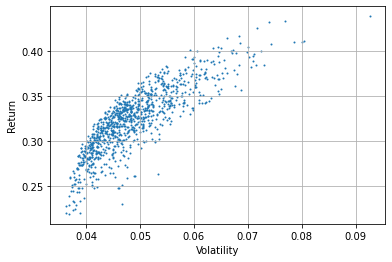

In [5]:
from matplotlib import pyplot as plt
plt.scatter(Sigma, R, s=1)
plt.grid(True)
plt.xlabel("Volatility")
plt.ylabel("Return")
plt.show()

### Modern Portfolio Theory (MPT)
* MPT model assumes an investor usually consider **expected return and variance in return**. Markowitz intuition was to estimate investment risk through portfolio variance  (i.e. since it measures the variability in realized return around the expected return). 
  * Portfolio variance characterizes not only the individual variability of the return on each asset, but also how each asset's return tends to move with others (i.e. covariance). 

* **Portfolio weights $w_i$ should be chosen such that the portfolio has the minimum volatility (variance)**

$$\min\{\sigma_P^2\}= \underset{\mathbf{w}}{\min}\{\mathbf{w}^T\Sigma\mathbf{w}\}$$


In [6]:
# markowitz
from scipy.optimize import minimize

n_assets = 5
def risk(w, covariance):
  return w.T.dot(covariance.dot(w))

def sum_weights(w):
  return w.sum() - 1

weights = [1/n_assets for _ in range(n_assets)]
bounds = [(0, 1) for _ in range(n_assets)]
constraints = [{'type':'eq', 'fun':sum_weights}]

res = minimize(risk, weights, bounds=bounds, constraints=constraints, args=(covariances))
print (res)


     fun: 0.03607029963897182
     jac: array([0.0723022 , 0.07233166, 0.0718961 , 0.0719931 , 0.07223676])
 message: 'Optimization terminated successfully.'
    nfev: 63
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([0.44544147, 0.06252824, 0.12333116, 0.36621571, 0.00248341])


In [7]:
# expected return

print (returns.dot(res.x))

0.22963597091593382


* The model recommends about 44% of the portfolio be invested in AAPL, about 6% in AMZN, 12% in FB and so on...
* The expected return is about 23%, with a variance of about 0.036 (standard deviation of 0.19).

* We based the model simply on statistical data derived from daily returns. However it could be possible to use also information about its expected future performance.

### Efficient Frontier and Parametric Analysis
* There is no precise way for an investor to determine the “correct” trade off between risk and return
  * generally higher expected return has to be *paid* with higher risk. 

* **Interested in looking at the relative distribution of the two**. 
  * Draw the **efficient frontier** of return and risk; 
  * need to solve for the minimum variance portfolio over a range of values for the expected return.

In [8]:
# efficient frontier
import numpy as np

n_assets = 5
def target_return(w, returns, target):
  return (returns.dot(w) - target)

for t_ret in np.arange(0.2, 0.4, 0.01):
  weights = [1/n_assets for _ in range(n_assets)]
  bounds = [(0, 1) for _ in range(n_assets)]
  constraints = [{'type':'eq', 'fun':sum_weights},
                  {'type':'eq', 'fun':target_return, 'args':(returns, t_ret)}]

  res = minimize(risk, weights, bounds=bounds, constraints=constraints, args=(covariances))


<img src="https://drive.google.com/uc?id=1UYXawAY5x7tfa26332L1FWj0Jyimm-7a">

### Criticisms to Markowitz Model

* The tendency to produce extreme portfolios combining extreme shorts with extreme longs. As a result,portfolio managers generally do not trust these extreme weights. This problem is typically caused by
estimation errors in the mean return vector and covariance matrix;
* the portfolio weights tend to be extremely sensitive to very small changes in the expected returns. For example, even a small increase in the expected return of just one asset can dramatically alter the optimal composition of the entire portfolio;
* the presence of heavy tails in the return distributions can result in significant errors in covariance estimates as well.

### Portfolios with a Risk-Free Asset
* When one of the asset of the portfolio is risk free, then the efficient frontier has a particularly simple form: the *capital allocation line* (CAL). 

* The simplest example is a portfolio containing two assets: one risk-free with $\mathbb{E}[R_f] = 3\%$ (e.g. treasury bill) and one risky (e.g. a stock) with $\mathbb{E}[R_r] = 10\%$ and standard deviation $\sigma_r = 20\%$.
  * The question that needs to be answered for any individual investor is how much to invest in each of these assets ?

$$\mathbb{E}[R_p] = \mathbb{E}[R_f]\cdot w_f + \mathbb{E}[R_r] \cdot ( 1 − w_f )$$
where $w_f$ is the relative allocation to the risk-free asset.

$$\sigma_p = ( 1 − w_f ) \cdot \sigma_r$$

* If $w_f = 1$ the expected return would be 3% and the risk of the portfolio would be 0%. 
* If $w_f = 0$ would give an investor an expected return of 10% and a portfolio risk of 20%. 
* If $w_f=0.25$:

$$\mathbb{E}[R_p] = ( 3\% \cdot 25\% ) + ( 10\% \cdot 75\% ) = 0.75\% + 7.5\% = 8.25\%$$

$$\sigma_p = 75\%\cdot 20\% = 15\%$$

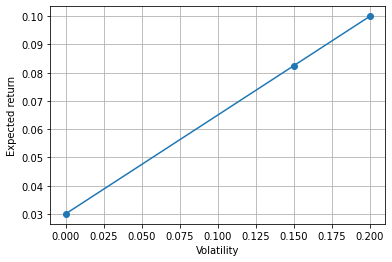

In [9]:
from matplotlib import pyplot as plt
x = [0, 0.15, 0.20]
y = [0.03, 0.0825, 0.1]
plt.plot(x, y, marker='o')
plt.xlabel("Volatility")
plt.ylabel("Expected return")
plt.grid(True)
plt.show() 

* The slope of this line measures the trade off between risk and return: a higher slope means that investors receive a higher expected return in exchange for taking on more risk. 

In [13]:
# CAL for the example
# last asset risk-free
n_assets = 6
rf_returns = np.append(returns, 0.1)
rf_cov = np.column_stack((covariances, [0,0,0,0,0]))
rf_cov = np.row_stack((rf_cov, [0,0,0,0,0,0]))

for t_ret in np.arange(0.1, 0.4, 0.01):
  weights = [1/n_assets for _ in range(n_assets)]
  bounds = [(0, 1) for _ in range(n_assets)]
  constraints = [{'type':'eq', 'fun':sum_weights},
                  {'type':'eq', 'fun':target_return, 'args':(rf_returns, t_ret)}]

  res = minimize(risk, weights, bounds=bounds, constraints=constraints, args=(rf_cov))


<img src="https://drive.google.com/uc?id=16VmljWbK7dQtyPZi5CW6k-K_0KWiqhkY">

* **The efficient frontier has become a straight line, tangent to the
frontier of the risky assets only.** 

* When the target is 10% the entire investment is allocated to the
risk-free asset, as the target increases the fraction of the risky assets grows proportionally to the volatility.


### The Sharpe Ratio
* The goal of an investor is to find the portfolio that generates the steepest possible line when combined with the risk-free investment. 
  * **The slope of this line is called the Sharpe ratio of the portfolio;**
  * steepest line means highest return assuming the same level of risk.

* The Sharpe ratio is defined as:

$$\mathcal{S} = (R_p - r_0 ) / \sigma_p $$
  * with $R_p$ portfolio expected return, $\sigma_p$ portfolio standard deviation in return (risk), and $r_0$ the return of the risk-free asset.

* Sharpe ratio measures how much additional return we achieved for the additional risk we took on, relative to putting all our money in a risk-free asset.

* Assume you want to achieve a certain level of return $R_\textrm{target}$ with your portfolio, what is the fraction $w_p$ of your wealth to place in the riscky part of the portfolio ?

$$ ( 1 - w_p ) * r_0 + w_p * R_p = R_\textrm{target}\\[5pt]$$

$$ w_p = \cfrac{( R_\textrm{target} – r_0)}{( R_p – r_0)}\\[5pt]$$

* The corresponding risk is

$$ w_p\cdot \sigma_p = \left[\cfrac{( R_\textrm{target} – r_0)}{(R_p – r_0)}\right]\cdot \sigma_p $$

* So if you want to minimize the portfolio risk you need to find:

$$ \min\left\{\left[\cfrac{(R_\textrm{target} – r_0)}{(R_p – r_0)}\right]\cdot \sigma_p\right\} = \min\left\{\cfrac{( R_\textrm{target} – r_0)}{\mathcal{S}}\right\}\\[5pt]$$

* But $R_\textrm{target}$ and $r_0$ are fixed so minimizing the above ratio is equivalent to maximize the Sharpe ratio:

$$ \min\left\{\cfrac{( R_\textrm{target} – r_0)}{\mathcal{S}}\right\} \implies\max\left\{\mathcal{S}\right\}\\[5pt]$$

* **The risky portfolio that maximizes the Sharpe ratio is the one that minimize the variance at the same time**.

In [18]:
# Sharpe ratio optimization
n_assets = 5
r0 = 0.10

def sharpeRatio(w, returns, covariances, r0):
  Rp = returns.dot(w)
  sigma = np.sqrt(w.T.dot(covariances.dot(w)))
  return -(Rp-r0)/sigma

weights = [1/n_assets for _ in range(n_assets)]
bounds = [(0,1) for _ in range(n_assets)]
constraints = [{'type':'eq', 'fun':sum_weights}]
res = minimize(sharpeRatio, weights, bounds=bounds, constraints=constraints,
               args=(returns, covariances, r0))
print (res)
print (returns.dot(res.x))
print (np.sqrt(res.x.T.dot(covariances.dot(res.x))))



     fun: -1.2593178439364743
     jac: array([-0.37875985, -0.37936528, -0.26915939,  0.02855796, -0.37932482])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([1.19754313e-01, 5.43974197e-01, 1.43114687e-17, 7.67615138e-17,
       3.36271490e-01])
0.43202925253416985
0.2636580225817231


<img src="https://drive.google.com/uc?id=1vrNSG5_-ACIkF3DuKxZ6wQXnOsN0C9yz">

* **The optimization using the Sharpe ratio gives a portfolio that is
on the minimum volatility efficient frontier, and gives the maximum
return relative to putting all our money in the risk-free asset**.

## Portfolio Diversification

* A security total risk can be divided into:
  * **unsystematic**, the risk portion peculiar to the company that can be diversified away;
  * **systematic**, the non-diversifiable portion that is related to the
movement of the stock market and is therefore unavoidable.

* **Diversification** is a common topic in portfolio construction and allows to combine risky stocks so that the resulting portfolio is less risky than the sum of its components. 
  * Unfortunately, perfect negative relationship between the returns is very rare in real world;
  * however diversification will always reduce risk;
  * empirical studies have demonstrated that risk can be virtually eliminated in portfolios of 30 to 40 randomly selected stocks. 

* When using the standard variation of the portfolio return as a measure of the risk, as in the Markowitz model, it is easy to show how diversification allows to reduce the risk (assume an equally weighted portfolio):

$$\sigma_P = \sqrt{0.5\sigma_1^2 + 0.5\sigma_2^2 + 2 \cdot 0.5\sigma_1 \cdot 0.5\sigma_2\cdot\rho_{12}} \lt  0.5\sigma_1 + 0.5\sigma_2$$

* The inequality holds unless $\rho_{12} = 1$, so in general, **for risk, the whole is less than the sum of its parts**. 


## Capital Asset Pricing Model

* The Capital Asset Pricing Model (CAPM) describes the relationship between expected return of assets and **systematic risk** of the market.
  * No measure of unsystematic risk appears in the risk premium for in the world of CAPM diversification has already eliminated it.
  
* In such a model, it is assumed a linear relationship between the expected return of any security (or portfolio) and the expected return of the *market
portfolio*. It is given by

$$r_i = r_f + \beta_i(r_m-r_f)$$
* where:
  * $r_i$ is the expected return of the $i^{th}$ security;
  * $r_f$ is the risk-free rate with zero standard deviation (e.g. Treasury Bills rates);
  * $r_m - r_f$ is the risk premium ($r_m$ denotes the market return including all securities in the market, e.g. an index like S\&P 500);
  * $\beta_i$ is a measure of $i^{th}$ asset volatility in relation to the overall market. 

* The relationship between risk and expected return is called the security market line (SML).
  * (Undervalued) No security can sell for long at prices low enough to yield more than its appropriate return on the SML; 
    * the security would then be very attractive compared with other securities of similar risk, and investors would bid its price up until its expected return fell to the appropriate position on the SML.
  * (Overvalued) Conversely, investors would sell off any stock selling at a price high enough to put its expected return below its appropriate position. 
    * The resulting reduction in price would continue until the stock’s expected return rose to the level justified by its systematic risk.

<img src="https://drive.google.com/uc?id=1jqdqKl1tkdyKS2D4hrPbaXRR4hDW-lF2">

* CAPM $\beta$ can be estimated with the measurement of the slope of the *regression line*, of the market vs individual stock return distribution.



### Linear Regression

* Given two sets of measurements $X$ and $y$ the linear regression determines the parameter $\alpha$ and $\beta$ such that

$$y=\beta X + \alpha$$

by minimizing the sum of the squared differences between the predicted and true $y$ values.

<img src="https://drive.google.com/uc?id=1gy8nApIAucDZB17TFDZ5gFkgfKtACYgJ">

* Notice that $X$ can be a vector of measurements, in that case it is a **multiple linear regression**, and $\beta$ will be a vector of coefficients each associated with a $X$ component.

* The regressed coefficient estimates can be expressed as

$$\beta \approx \cfrac{\textrm{cov}(X,y)}{\textrm {var}(X)}$$

* so provides insights about how *volatile*, or how risky, a stock is relative to the rest of the market.

* CAPM $\beta$ calculation helps investors understand whether a stock moves in the same direction as the rest of the market.
  * If $\beta= 1.0$ stock price is perfectly correlated with the market;
  * if $\beta < 1.0$ ("defensive"), the security is theoretically less volatile than the market (i.e. provides lower returns, so it is less risky);
  * if $\beta > 1.0$, ("aggressive"), the assets price is more volatile than the market.

* The point is to find stocks that have high $\beta$, and portfolios that have high $\alpha$. 
  * High $\beta$ values mean that the stock fares better than index;
  * $\alpha$ values above zero mean that your portfolio gives positive return no matter what the market does.

* Input data on [capm.csv](https://raw.githubusercontent.com/matteosan1/finance_course/develop/libro/input_files/capm.csv)

In [20]:
# load capm file
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/matteosan1/finance_course/develop/libro/input_files/capm.csv")
print (df.head())

         Date      AAPL     AMZN  ...    ret_RF  ret_CL=F   ret_XOM
0  2000-08-29  0.907489  39.6250  ... -0.000016 -0.004574 -0.003575
1  2000-08-30  0.912280  42.9375  ...  0.000000  0.020569 -0.014111
2  2000-08-31  0.934321  41.5000  ... -0.000016 -0.009023  0.003467
3  2000-09-01  0.972652  41.5000  ... -0.000049  0.008424  0.010520
4  2000-09-05  0.957318  45.6875  ... -0.000033  0.012504  0.010583

[5 rows x 16 columns]


<img src="https://drive.google.com/uc?id=1oUwaZTw-HlJ14QZ-nZ1jxxz3fSc1lwKo">

* Regression with $\texttt{statsmodels.api.OLS}$.

In [22]:
# CAPM on ret_GE vs ret_SP500
import statsmodels.api as sm

X = df['ret_SP500']
X = sm.add_constant(X)
y = df['ret_GE']

model = sm.OLS(y, X)
res = model.fit()
print (res.summary())

                            OLS Regression Results                            
Dep. Variable:                 ret_GE   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     4554.
Date:                Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:37:49   Log-Likelihood:                 9727.2
No. Observations:                3358   AIC:                        -1.945e+04
Df Residuals:                    3356   BIC:                        -1.944e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.000     -0.575      0.5

* From the detailed summary the most important information is:
  * **R-squared**: the closer to 1 the higher is the linear correlation between $y$ and $X$;
  * **coeff column**: the $\beta$ resulting from the regression, represent the mean change in the response variable $y$ for one unit of change in the predictor variable $X$;
  * **P>|t| column**: the p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis. In other words, a predictor that has a low p-value is likely to be a meaningful addition to your model because changes in the predictor’s value are related to changes in
the response variable. Conversely, a larger (insignificant) p-value suggests that changes in the predictor are not associated with changes in the response.

<img src="https://drive.google.com/uc?id=1FrKRa4fZtgUbwafnHctZVKKv25k2kRGv" width=300>

<img src="https://drive.google.com/uc?id=14DfI_dZV1nN3762OQn-fvBd22skTeX1i">

* The whole model is about plotting a line in a scatter plot: not a very complex model. 

* Assumptions under the model are even more simplistic:
  * expect that all investors are rational and they avoid risk;
  * everyone have full information about the market;
  * everyone have similar investment horizons and expectations about future movements;
  * stocks are all correctly priced.

* Moreover, this is a model from the 1950s; market dynamics were different back then. And of course, this is a retrospective model. We cannot know how future stock prices move and how the market behaves.

## Multifactor Models

* In its original formulation CAPM treats the market return as the only factor.

* Nevertheless a stock’s return can depend also on other macro-economic factors, such commodity prices, interest rates, economic growth (GDP).

$$r_i = \alpha + \beta_1 f_1 + \beta_2 f_2 + \beta_3 f_3 + \ldots$$

* Consider to improve the CAPM model by adding the **crude oil price** as a second factor. 

In [23]:
# CAPM of ret_GE vs ret_SP500 and ret_CL=F

X = df[['ret_SP500', 'ret_CL=F']]
X = sm.add_constant(X)
y = df['ret_GE']

model = sm.OLS(y, X)
res = model.fit()
print (res.summary())

                            OLS Regression Results                            
Dep. Variable:                 ret_GE   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     2289.
Date:                Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:44:47   Log-Likelihood:                 9732.7
No. Observations:                3358   AIC:                        -1.946e+04
Df Residuals:                    3355   BIC:                        -1.944e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.000     -0.521      0.6

* The regression coefficient for the oil factor (ret_CL=F) is statistically significant and negative; 
  * over the analysis period, price changes in GE stock are negatively related to the price changes in oil. 
  
* Let’s apply the same model now to Exxon (XOM) stock.

In [24]:
# CAPM of ret_XOM vs ret_SP500 and ret_CL=F
X = df[['ret_SP500', 'ret_CL=F']]
X = sm.add_constant(X)
y = df['ret_XOM']

model = sm.OLS(y, X)
res = model.fit()
print (res.summary())

                            OLS Regression Results                            
Dep. Variable:                ret_XOM   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     2140.
Date:                Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:47:11   Log-Likelihood:                 10457.
No. Observations:                3358   AIC:                        -2.091e+04
Df Residuals:                    3355   BIC:                        -2.089e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      1.185      0.2

* The R-squared for XOM is slightly lower than for GE. 
  * Its relationship to the market index is less strong (lower t value). 
  * The regression coefficient for the oil factor (ret_CL=F) is statistically
significant and, unlike GE, positive.